In [1]:
import bigframes.pandas as bpd
import pandas as pd

In [2]:
b = bpd.from_glob_path("gs://garrettwu_bucket/images/*")
b

/usr/local/google/home/garrettwu/src/bigframes/bigframes/session/__init__.py:1710: UserWarning: No explicit location is set, so using location US for the session.
  return Session(context)


,uri
0,gs://garrettwu_bucket/images/images.jpeg
1,gs://garrettwu_bucket/images/images (1).jpeg
2,gs://garrettwu_bucket/images/download.jpeg


In [3]:
b["number"] = [0, 1, 2]
b["author"] = ["Alice", "Bob", "Alice"]

In [4]:
b["version"] = b["uri"].blob.version()
b["content_type"] = b["uri"].blob.content_type()

In [5]:
b

,uri,number,author,version,content_type
0,gs://garrettwu_bucket/images/images.jpeg,0,Alice,1708566948182921,image/jpeg
1,gs://garrettwu_bucket/images/images (1).jpeg,1,Bob,1708566948192241,image/jpeg
2,gs://garrettwu_bucket/images/download.jpeg,2,Alice,1708566948168122,image/jpeg


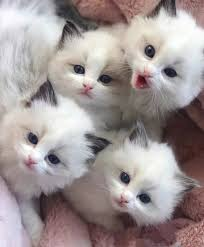

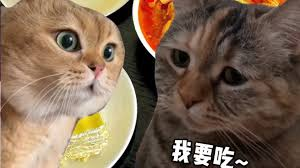

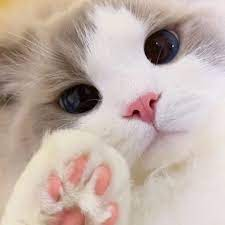

In [6]:
b["uri"].blob.display()

In [7]:
from bigframes import blob, clients
import numpy as np
import base64
import cv2 as cv
from google.cloud import storage

In [8]:
gcs_manager = clients.GcsManager()

In [9]:
bs = gcs_manager.download_as_bytes("garrettwu_bucket", "images/images.jpeg")

In [10]:
bs

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x13\x12\x15\x13\x13\x13\x16\x16\x15\x15\x18\x18\x17\x17\x16\x18\x15\x17\x15\x15\x17\x17\x17\x17\x16\x17\x15\x17\x15\x18\x18\x1d( \x18\x1a%\x1d\x15\x15!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x17\x10\x10\x17-\x1d\x1d\x1d--+----------+-----------------+-----------------7\xff\xc0\x00\x11\x08\x00\xf7\x00\xcc\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x02\x03\x06\x07\x01\x00\x08\xff\xc4\x007\x10\x00\x01\x03\x03\x02\x03\x06\x05\x03\x03\x05\x01\x01\x00\x00\x00\x01\x00\x02\x11\x03\x04!\x051\x12AQ\x06aq\x81\x91\xa1\x13"\xb1\xc1\xf0\x142\xd1B\xe1\xf1\x07#Rbr\x82\x15\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x00\x04\x05\xff\xc4\x00\x1e\x11\x01\x01\x01\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x01\x11\x02\x03\x12!1AQa\xff\xda\x00\x0c\x03

In [11]:
nparr = np.frombuffer(bs, np.uint8)

img = cv.imdecode(nparr, cv.IMREAD_UNCHANGED)
RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


In [12]:
RGB_img

array([[[155, 153, 167],
        [166, 164, 178],
        [181, 179, 193],
        ...,
        [134,  94,  94],
        [132,  92,  92],
        [142, 102, 102]],

       [[159, 157, 171],
        [170, 168, 182],
        [184, 182, 196],
        ...,
        [135,  95,  95],
        [134,  94,  94],
        [144, 104, 104]],

       [[165, 163, 176],
        [176, 174, 187],
        [190, 188, 201],
        ...,
        [132,  94,  93],
        [132,  92,  92],
        [142, 102, 102]],

       ...,

       [[233, 229, 246],
        [230, 226, 243],
        [228, 224, 241],
        ...,
        [166, 125, 123],
        [155, 115, 113],
        [161, 121, 119]],

       [[233, 229, 246],
        [230, 226, 243],
        [227, 223, 240],
        ...,
        [172, 131, 129],
        [174, 134, 132],
        [173, 133, 131]],

       [[232, 228, 245],
        [229, 225, 242],
        [227, 223, 240],
        ...,
        [168, 127, 125],
        [184, 144, 142],
        [184, 144, 142]]

In [13]:
storage_client = storage.Client()

In [14]:
bucket = storage_client.bucket("garrettwu_bucket")
# blob = bucket.blob("images/images.jpeg")

In [15]:
img = cv.blur(img, (10, 10))

In [16]:
img_bts = cv.imencode(".jpeg", img)[1].tobytes()
img_bts

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x00\xf7\x00\xcc\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\

In [17]:
blob_upload = bucket.blob("foler_not_exist/images_blurred.jpeg")
blob_upload.upload_from_string(img_bts, content_type="image/jpeg")

In [18]:
blob_upload.path

'/b/garrettwu_bucket/o/foler_not_exist%2Fimages_blurred.jpeg'

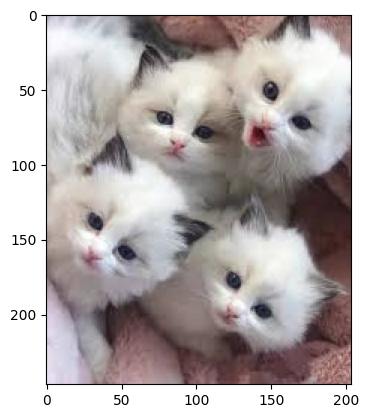

In [19]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

from matplotlib import pyplot as plt

#Show the image with matplotlib
plt.imshow(RGB_img)
plt.show()

In [1]:
import bigframes.pandas as bpd

In [2]:
df = bpd.DataFrame({"a": [1, 2], "b": [3, 4]})

/usr/local/google/home/garrettwu/src/bigframes/bigframes/session/__init__.py:2043: UserWarning: No explicit location is set, so using location US for the session.
  return Session(context)


In [3]:
df.columns

Index(['a', 'b'], dtype='object')

In [4]:
"a" in df.columns

True